# **Sentiment Ananlyzer using machine learning**


In [1]:
pip install ntk

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install pyperclip

Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import ntk
from sklearn. feature_extraction.text import CountVectorizer
from wordcloud import WordCloud, STOPWORDS
#from nitk import stem
from nltk.stem import WordNetLemmatizer
from nltk. tokenize import word_tokenize
import re, string, unicodedata
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
from sklearn.model_selection import train_test_split
from string import punctuation
from nltk import pos_tag
from nltk.corpus import wordnet
import re
import warnings
warnings. filterwarnings ('ignore')
import matplotlib.pyplot as plt

In [4]:
#from google.colab import files
#uploaded = files.upload()

In [5]:
''''from google.colab import drive
drive.mount('/content/drive')'''

"'from google.colab import drive\ndrive.mount('/content/drive')"

**Loading of Data**

In [6]:
%%time
df = pd.read_csv('IMDB-Dataset.csv',encoding = 'latin-1')

CPU times: total: 3.23 s
Wall time: 3.34 s


In [7]:
df

Ratings                                            Reviews  \
0           1.0  *Disclaimer: I only watched this movie as a co...   
1           1.0  I am writing this in hopes that this gets put ...   
2           1.0  Really, I could write a scathing review of thi...   
3           1.0  If you saw the other previous spoof movies by ...   
4           1.0  This movie I saw a day early for free and I st...   
...         ...                                                ...   
149995     10.0  GoldenEye (1995) is my number 1 personal favor...   
149996     10.0  *** 1/2Starring: Pierce Brosnan, Izabella Scor...   
149997     10.0  I've given this film a 10, not just because I ...   
149998     10.0  I absolutely adore this movie. What a comeback...   
149999     10.0  I rented Boogie Nights last week and I could t...   

                Movies                                           Resenhas  
0       Disaster Movie  * IsenÃ§Ã£o de responsabilidade: eu sÃ³ assist...  
1       Disaster Movie  Estou escrevendo isso na esperanÃ§a de que iss...  
2       Disaster Movie  Realmente, eu poderia escrever uma crÃ­tica co...  
3       Disaster Movie  Se vocÃª viu os outros filmes falsificados ant...  
4       Disaster Movie  Este filme eu vi um dia cedo de graÃ§a e ainda...  
...                ...                                                ...  
149995       GoldenEye  GoldenEye (1995) Ã© o meu filme favorito pesso...  
149996       GoldenEye  Estrelando: Pierce Brosnan, Izabella Scorupco,...  
149997       GoldenEye  Eu dei 10 a este filme, nÃ£o apenas porque eu ...  
149998       GoldenEye  Eu absolutamente adoro este filme. Que retorno...  
149999   Boogie Nights  Aluguei o Boogie Nights na semana passada e pu...  

[150000 rows x 4 columns]

In [8]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
'''from sklearn.base import BaseEstimator, TransformerMixin
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
import re'''
stop_words = stopwords.words('english')
new_stopwords = ["mario","movie","one","film","la","blah","saturday","monday","sunday","morning","evening","friday","would","shall","could","might"]
stop_words.extend(new_stopwords)
stop_words.remove("not")
stop_words=set(stop_words)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\KIIT\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


**Data Cleaning and Preprocessing pipeline**


In [9]:
def remove_special_character(content):
    return re.sub('\[[^&@#!]]*\]','', content )

In [10]:
def remove_url(content):
    return re.sub(r'http\S+', '', content)

In [11]:
def remove_stopwords(content):
    clean_data = []
    for i in content.split():
        if i.strip().lower() not in stop_words and i.strip().lower().isalpha():
            clean_data.append(i.strip().lower())
    return " ".join(clean_data)

In [12]:
def contraction_expansion(content):
    content = re.sub(r"won\'t", "would not", content)
    content = re.sub(r"can\'t", "can not", content)
    content = re.sub(r"don\'t", "do not", content)
    content = re.sub(r"shouldn\'t", "should not", content)
    content = re.sub(r"needn\'t", "need not", content)
    content = re.sub(r"hasn\'t", "has not", content)
    content = re.sub(r"haven\'t", "have not", content)
    content = re.sub(r"weren\'t", "were not", content)
    content = re.sub(r"mightn\'t", "might not", content)
    content = re.sub(r"didn\'t", "did not", content)
    content = re.sub(r"n\'t", " not", content)
    content = re.sub(r"\'re", " are", content)
    content = re.sub(r"\'s", " is", content)
    content = re.sub(r"\'d", " would", content)
    content = re.sub(r"\'ll", " will", content)
    content = re.sub(r"\'t", " not", content)
    content = re.sub(r"\'ve", " have", content)
    content = re.sub(r"\'m", " am", content)
    return content


In [13]:
def data_cleaning(content):
    content = remove_special_character(content)
    content = remove_url(content)
    content = contraction_expansion(content)
    content = remove_stopwords(content)
    return content

In [14]:
''''class DataCleaning(BaseEstimator,TransformerMixin):
    def __init__(self):
        print('calling--init--')
    def fit(self,X,y=None):
        print('calling fit')
        return self
    def transform(self, X,y=None):
        print('calling transform')
        X=X.apply(data_cleaning)
        return X'''

"'class DataCleaning(BaseEstimator,TransformerMixin):\n    def __init__(self):\n        print('calling--init--')\n    def fit(self,X,y=None):\n        print('calling fit')\n        return self\n    def transform(self, X,y=None):\n        print('calling transform')\n        X=X.apply(data_cleaning)\n        return X"

In [15]:
'''class LemmaTokenizer(object):
    def __init__(self):
        self.wordnetlemma = WordNetLemmatizer()
    def __call__(self, reviews):
        return [self.wordnetlemma.lemmatize(word) for word in word_tokenize(reviews)]'''

'class LemmaTokenizer(object):\n    def __init__(self):\n        self.wordnetlemma = WordNetLemmatizer()\n    def __call__(self, reviews):\n        return [self.wordnetlemma.lemmatize(word) for word in word_tokenize(reviews)]'

In [16]:
%%time
pd.options.display.max_colwidth = 1000
#Data cleaning
df['Reviews']=df['Reviews'].apply(data_cleaning)
df.head(5)

CPU times: total: 11.5 s
Wall time: 11.7 s


Ratings  \
0      1.0   
1      1.0   
2      1.0   
3      1.0   
4      1.0   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   Reviews  \
0                                                                                                                                                               watched conditional see films not caught dead giving hard earned money explain depth write shortest not see far unbelievably unfunny ever total since hatred others like extends far beyond think go not know people besides carmen vanessa kim not though think editing flat possibly blatant continuity errors make crapfast even crappier thought know films not supposed serious come someone gets minor facial next someone gets cut blood least cut since narnia films away give disaster pass thoughtless mindless physical gags obviously take popular movies last year late including best picture know saddest thing stupid movies not care much money many cameos sorry ass excuses films taking away jobs directors truly deserve thought better taste ashamed making kind jason friedberg aaron burn guys contributing decline western cause downfall western   
1                                                                                                                                                                                                                                                                                                                                  writing hopes gets put previous review anyone find slop entertaining completely beyond first spoof entitled indeed spoof disaster seen count disaster iron alvin amy hancock register disaster selzterwater failburg shown lack sort writing skill unfortunately tortured date epic know exactly expect jokes bad references cheaply remade scenes someone informed satire copy paste though not say actually seem taken nothing clever witty remotely smart way two not believe people still pay see insult though enjoy films doubt smart enough realize unfortunately not number low enough includes rate deserves top worst films right date epic mean meet rather forced hour hands marathon watch   
2                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   write scathing review turd going making observations points point watching movies reader remember scary remember original comedic elements funny pretty forgettable worth price last time premise stop making call boycott pieces monkey know going line pre pubescent annoying little spouting crappy liners rick james movies continue make form monetary considering producti

**Data Overview**

In [17]:
df.isna().sum()

Ratings      0
Reviews      0
Movies      25
Resenhas     0
dtype: int64

In [18]:
df['Ratings'].describe()

count    150000.000000
mean          5.500000
std           2.872291
min           1.000000
25%           3.000000
50%           5.500000
75%           8.000000
max          10.000000
Name: Ratings, dtype: float64

In [19]:
df['Reviews'].describe()

count     150000
unique    149744
top             
freq          11
Name: Reviews, dtype: object

In [20]:
print('Unique reviews :%s '% df.Reviews.nunique())
print('Unique movie names : %s'% df.Movies.unique())
print('No of ratings : %s'% df.Ratings.count())

Unique reviews :149744 
Unique movie names : ['Disaster Movie' 'Justin Bieber: Never Say Never' 'Reis' ...
 'Cool Cat in the Hollywood Christmas Parade' 'Kendra' 'Evim Sensin']
No of ratings : 150000


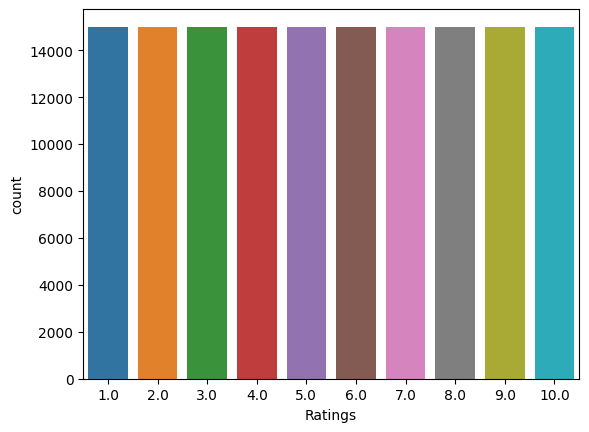

Ratings
1.0     15000
2.0     15000
4.0     15000
3.0     15000
5.0     15000
6.0     15000
8.0     15000
7.0     15000
10.0    15000
9.0     15000
Name: count, dtype: int64


In [21]:
#checking for class imbalance
sns.countplot(x=df['Ratings'])
plt.show()
print(df['Ratings'].value_counts())

CPU times: total: 28.1 s
Wall time: 28.2 s


(-0.5, 1499.5, 799.5, -0.5)

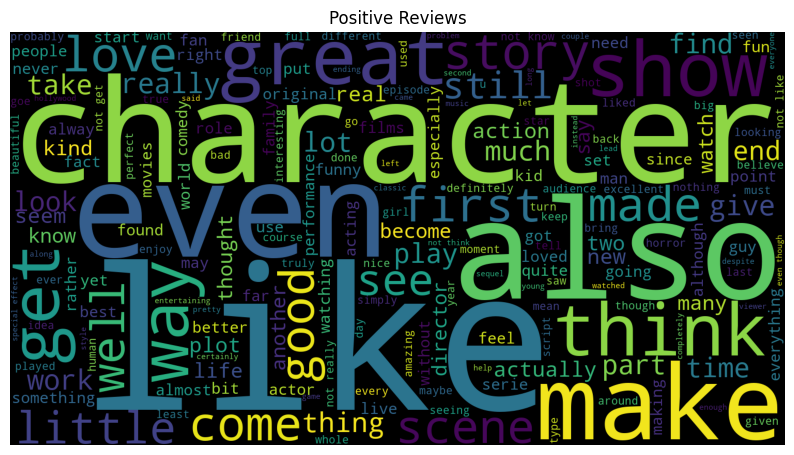

In [22]:
%%time
sentences=df['Reviews']
pos=' '.join(map(str,sentences[df['Ratings']>=7]))
neg=' '.join(map(str,sentences[df['Ratings']<=4]))

pos_wordcloud = WordCloud(width=1500,height=800,
                background_color='black',
                stopwords=stop_words,
                min_font_size=15).generate(pos)

plt.figure(figsize=(10,10))
plt.imshow(pos_wordcloud)
plt.title('Positive Reviews')
plt.axis('off')

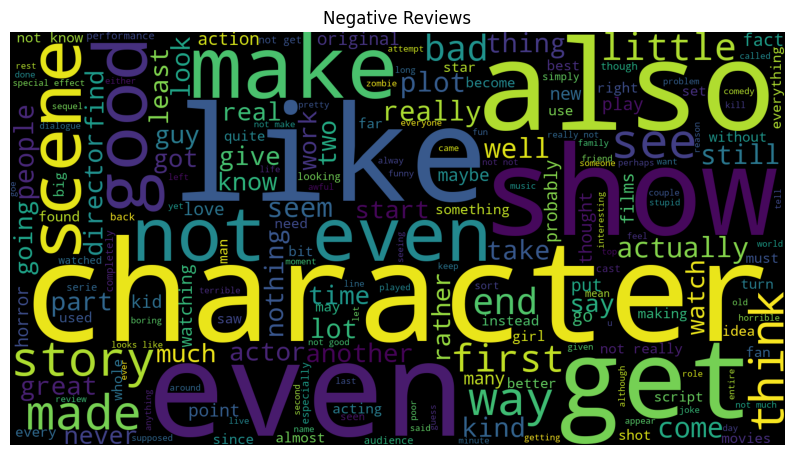

CPU times: total: 25.4 s
Wall time: 25.5 s


In [23]:
%%time

neg_wordcloud = WordCloud(width = 1500, height = 800,
                background_color = 'black',
                stopwords = stop_words,
                min_font_size = 15).generate(neg)

plt.figure(figsize=(10,10))
plt.imshow(neg_wordcloud)
plt.title('Negative Reviews')
plt.axis('off')
plt.show()

In [24]:
#Visualization of number of charactor in reviews


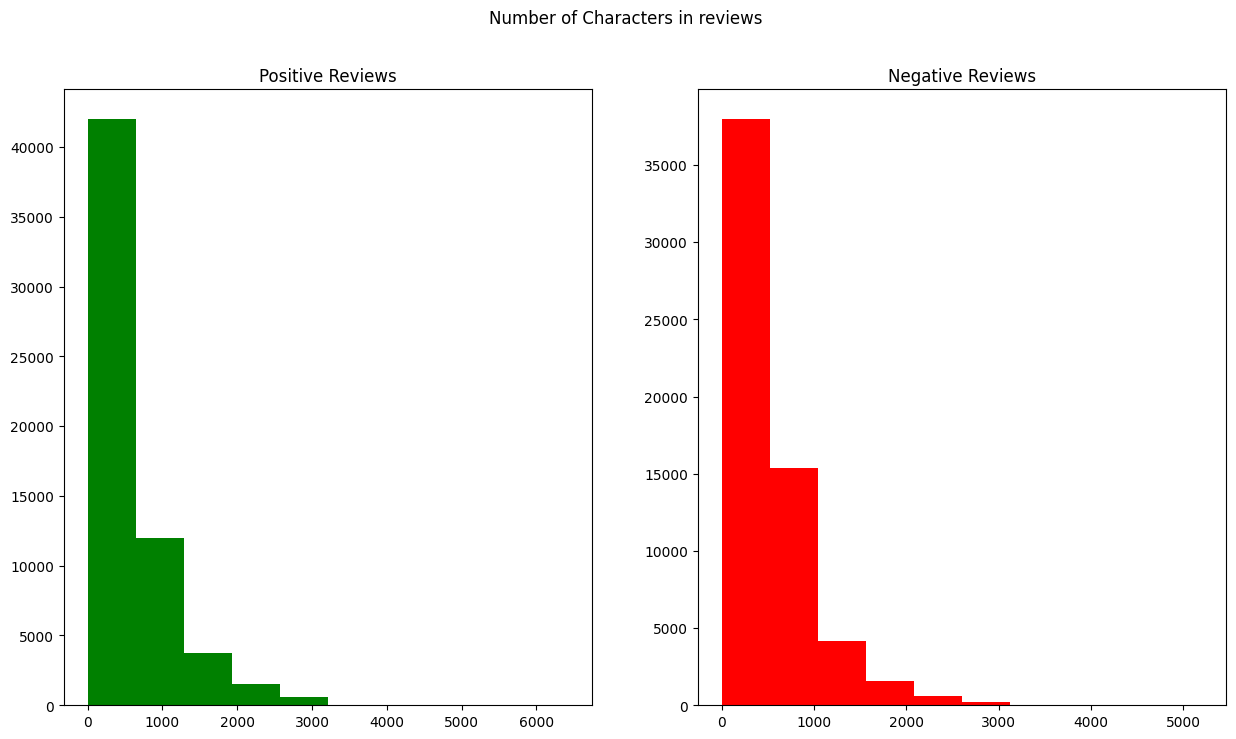

In [25]:
figure, (pos_ax, neg_ax)=plt.subplots (1,2, figsize=(15,8))
len_pos_review=df[df['Ratings']>=7]['Reviews'].str.len()
pos_ax.hist(len_pos_review,color='green')
pos_ax.set_title('Positive Reviews')
len_neg_review=df[df['Ratings']<=4]['Reviews'].str.len()
neg_ax.hist(len_neg_review,color='red')
neg_ax.set_title('Negative Reviews')
figure.suptitle('Number of Characters in reviews')
plt.show()

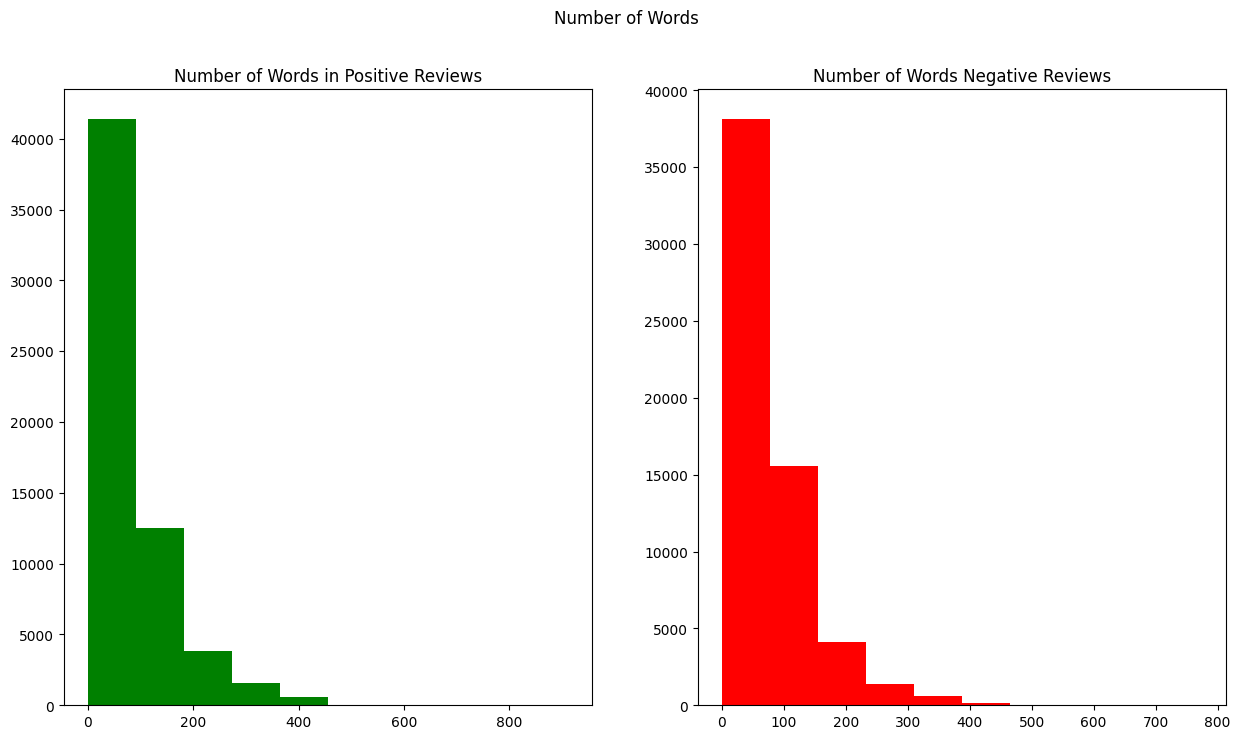

In [26]:
figure, (pos_ax, neg_ax) = plt.subplots(1, 2, figsize=(15, 8))
pos_word = df[df['Ratings'] >= 7]['Reviews'].str.split().map(lambda review: len(review))
pos_ax.hist(pos_word, color='green')
pos_ax.set_title('Number of Words in Positive Reviews')
neg_word=df[df['Ratings']<=4]['Reviews'].str.split().map(lambda review: len(review))
neg_ax.hist(neg_word,color='red')
neg_ax.set_title("Number of Words Negative Reviews")
figure.suptitle('Number of Words')

plt.show()

Text(0.5, 0.98, 'Average word length in Reviews')

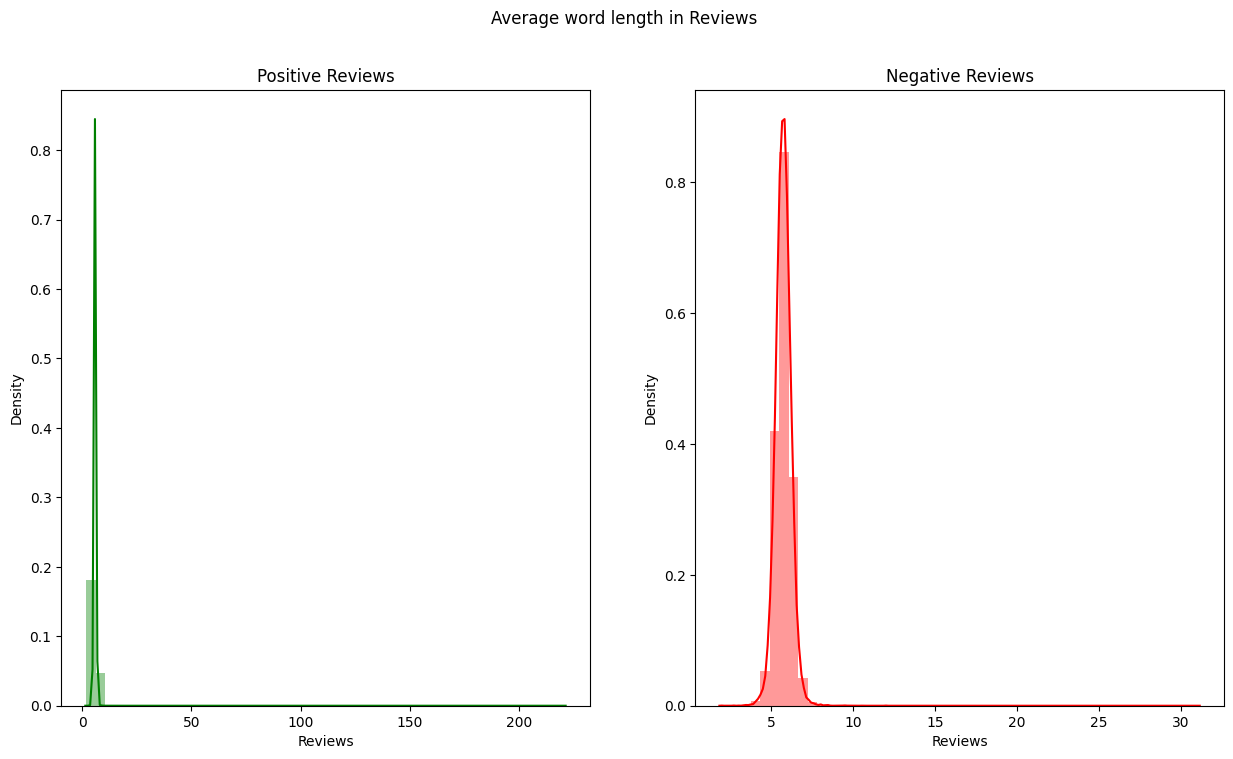

In [27]:
figure, (pos_ax, neg_ax) = plt.subplots(1, 2, figsize=(15, 8))

pos_word = df[df['Ratings'] >= 7]['Reviews'].str.split().apply(lambda x: [len(i) for i in x])
sns.distplot(pos_word.map(lambda x: np.mean(x)), ax=pos_ax,color="green")
pos_ax.set_title('Positive Reviews')
neg_word=df[df['Ratings']<=4]['Reviews'].str.split().apply(lambda x: [len(i) for i in x])
sns.distplot(neg_word.map(lambda x: np.mean(x)), ax=neg_ax,color='red')
neg_ax.set_title('Negative Reviews')
figure.suptitle("Average word length in Reviews")

In [28]:
def get_top_text_ngrams(corpus, n, g):
    vec = CountVectorizer(ngram_range=(g, g)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

In [29]:
most_common_uni = get_top_text_ngrams(df.Reviews[df['Ratings']>=7],20,1)
most_common_uni = dict(most_common_uni)
temp = pd.DataFrame(columns=["Common_words", "Count"])
temp["Common_words"] = list(most_common_uni.keys())
temp["Count"] = list(most_common_uni.values())
fig = px.bar(temp, x="Count", y="Common_words", title="Commmon Words in Positive Reviews", orientation="h", width=700, height=700, color="Common_words")
fig.show()

In [30]:
most_common_uni = get_top_text_ngrams(df.Reviews[df['Ratings']>=7],20,2)
most_common_uni = dict(most_common_uni)
temp = pd.DataFrame(columns=["Common_words", "Count"])
temp["Common_words"] = list(most_common_uni.keys())
temp["Count"] = list(most_common_uni.values())
fig = px.bar(temp, x="Count", y="Common_words", title="Commmon Words in Positive Reviews", orientation="h", width=700, height=700, color="Common_words")
fig.show()

In [31]:
most_common_uni = get_top_text_ngrams(df.Reviews[df['Ratings']>=7],20,3)
most_common_uni = dict(most_common_uni)
temp = pd.DataFrame(columns=["Common_words", "Count"])
temp["Common_words"] = list(most_common_uni.keys())
temp["Count"] = list(most_common_uni.values())
fig = px.bar(temp, x="Count", y="Common_words", title="Commmon Words in Positive Reviews", orientation="h", width=700, height=700, color="Common_words")
fig.show()

In [32]:
#pd.options.display.max_colwidth =  1000
#df[["Reviews", "Ratings", "Movies"]][(df['Ratings']>=7)&(df['Reviews'].str.contains("not like| not want| "))]

In [33]:
most_common_uni = get_top_text_ngrams(df.Reviews[df['Ratings']>=7],20,4)
most_common_uni = dict(most_common_uni)
temp = pd.DataFrame(columns=["Common_words", "Count"])
temp["Common_words"] = list(most_common_uni.keys())
temp["Count"] = list(most_common_uni.values())
fig = px.bar(temp, x="Count", y="Common_words", title="Commmon Words in Positive Reviews", orientation="h", width=700, height=700, color="Common_words")
fig.show()

In [34]:
most_common_uni = get_top_text_ngrams(df.Reviews[df['Ratings']<=4],20,1)
most_common_uni = dict(most_common_uni)
temp = pd.DataFrame(columns=["Common_words", "Count"])
temp["Common_words"] = list(most_common_uni.keys())
temp["Count"] = list(most_common_uni.values())
fig = px.bar(temp, x="Count", y="Common_words", title="Commmon Unigram in Negative Reviews", orientation="h", width=700, height=700, color="Common_words")
fig.show()

In [35]:
most_common_uni = get_top_text_ngrams(df.Reviews[df['Ratings']<=4],20,2)
most_common_uni = dict(most_common_uni)
temp = pd.DataFrame(columns=["Common_words", "Count"])
temp["Common_words"] = list(most_common_uni.keys())
temp["Count"] = list(most_common_uni.values())
fig = px.bar(temp, x="Count", y="Common_words", title="Commmon bigram in Negative Reviews", orientation="h", width=700, height=700, color="Common_words")
fig.show()

In [36]:
most_common_uni = get_top_text_ngrams(df.Reviews[df['Ratings']<=4],20,3)
most_common_uni = dict(most_common_uni)
temp = pd.DataFrame(columns=["Common_words", "Count"])
temp["Common_words"] = list(most_common_uni.keys())
temp["Count"] = list(most_common_uni.values())
fig = px.bar(temp, x="Count", y="Common_words", title="Commmon trigram in Negative Reviews", orientation="h", width=900, height=700, color="Common_words")
fig.show()

In [37]:
most_common_uni = get_top_text_ngrams(df.Reviews[df['Ratings']<=4],20,4)
most_common_uni = dict(most_common_uni)
temp = pd.DataFrame(columns=["Common_words", "Count"])
temp["Common_words"] = list(most_common_uni.keys())
temp["Count"] = list(most_common_uni.values())
fig = px.bar(temp, x="Count", y="Common_words", title="Commmon 4-gram in Negative Reviews", orientation="h", width=700, height=700, color="Common_words")
fig.show()

In [38]:
most_common_uni = get_top_text_ngrams(df.Reviews[df['Ratings']<=4],20,5)
most_common_uni = dict(most_common_uni)
temp = pd.DataFrame(columns=["Common_words", "Count"])
temp["Common_words"] = list(most_common_uni.keys())
temp["Count"] = list(most_common_uni.values())
fig = px.bar(temp, x="Count", y="Common_words", title="Commmon 5-gram in Negative Reviews", orientation="h", width=700, height=700, color="Common_words")
fig.show()

In [39]:
##Video-03---

FEATURE ENGINEERING


In [40]:
#Mapping rating data to Binary label 1 (+ve) if rating >=7 and 0 (-ve) if rating <=4 and 2 (neutral) if rating = 5 or 6
df['Label'] = df['Ratings'].apply(lambda x: '1' if x >= 7 else ('0' if x<=4 else '2'))
df=df[df.Label<'2']
data=df[['Reviews','Label']]
print(data['Label'].value_counts())

Label
0    60000
1    60000
Name: count, dtype: int64


In [41]:
import sys
import os
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from prettytable import PrettyTable
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer

In [42]:
!pip install prettytable

Lemmatization


In [43]:
class LemmaTokenizer(object):
    def __init__(self):
        self.wordnetlemma = WordNetLemmatizer()
    def __call__(self, reviews):
        return [self.wordnetlemma.lemmatize(word) for word in word_tokenize(reviews)]

Vectorization

In [44]:
!pip install nltk

In [45]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\KIIT\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\KIIT\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
train,test=train_test_split(data,test_size=.3,random_state=42, shuffle=True)
countvect = CountVectorizer(analyzer = "word", tokenizer = LemmaTokenizer(), ngram_range=(1,1), min_df=10,max_features=500)
tfidfvect = TfidfVectorizer(analyzer = "word", tokenizer  = LemmaTokenizer(), ngram_range=(1,1),min_df=10,max_features=500)
x_train_count = countvect.fit_transform(train['Reviews']).toarray()
x_test_count = countvect.transform(test['Reviews']).toarray()
x_train_tfidf = tfidfvect.fit_transform(train['Reviews']).toarray()
x_test_tfidf = tfidfvect.transform(test['Reviews']).toarray()
y_train = train['Label']
y_test = test['Label']

In [ ]:

lgr = LogisticRegression()
lgr.fit(x_train_count,y_train)
lgr.score(x_test_count,y_test)
lgr.coef_[0]
i=0
importantfeature = PrettyTable(["Feature", "Score"])
feature_names = countvect.get_feature_names_out()
for feature, importance in zip(feature_names, lgr.coef_[0]):
    if i <= 200:
        importantfeature.add_row([feature, importance])
        i = i + 1

print(importantfeature)

In [ ]:
## Feature Importance with TFIDF vectorizer and Logistic Regression with Unigram 

In [ ]:
lgr = LogisticRegression()
lgr.fit(x_train_tfidf,y_train)
lgr.score(x_test_tfidf,y_test)
lgr.coef_[0]
i=0
importantfeature = PrettyTable(["Feature", "Score"])
for feature, importance in zip(tfidfvect.get_feature_names_out(), lgr.coef_[0]):
    if i<=100:
        importantfeature.add_row([feature, importance])
        i=i+1
print(importantfeature)

Vectorizer with Bigram


In [ ]:
train,test=train_test_split(data,test_size=.3,random_state=42, shuffle=True)
countvect = CountVectorizer(analyzer = "word", tokenizer = LemmaTokenizer(), ngram_range=(2,2), min_df=10,max_features=500)
tfidfvect = TfidfVectorizer(analyzer = "word", tokenizer  = LemmaTokenizer(), ngram_range=(2,2),min_df=10,max_features=500)
x_train_count = countvect.fit_transform(train['Reviews']).toarray()
x_test_count = countvect.transform(test['Reviews']).toarray()
x_train_tfidf = tfidfvect.fit_transform(train['Reviews']).toarray()
x_test_tfidf = tfidfvect.transform(test['Reviews']).toarray()
y_train = train['Label']
y_test = test['Label']

In [ ]:
lgr = LogisticRegression()
lgr.fit(x_train_count,y_train)
lgr.score(x_test_count,y_test)
lgr.coef_[0]
i=0
importantfeature = PrettyTable(["Feature", "Score"])
for feature, importance in zip(countvect.get_feature_names_out(), lgr.coef_[0]):
    if i<=200:
        importantfeature.add_row([feature, importance])
        i=i+1
print(importantfeature)

In [ ]:
lgr.fit(x_train_tfidf,y_train)
lgr.score(x_test_tfidf,y_test)
lgr.coef_[0]
i=0
importantfeature = PrettyTable(["Feature", "Score"])
for feature, importance in zip(tfidfvect.get_feature_names_out(), lgr.coef_[0]):
    if i<=50:
        importantfeature.add_row([feature, importance])
        i=i+1
print(importantfeature)

In [ ]:
pd.options.display.max_colwidth = 1000
df[["Reviews","Ratings","Movies"]][(df['Ratings']>=9)&(df['Reviews'].str.contains("bad review"))].head(100)

In [ ]:
train,test=train_test_split(data,test_size=.3,random_state=42, shuffle=True)
countvect = CountVectorizer(analyzer = "word", tokenizer = LemmaTokenizer(), ngram_range=(3,3), min_df=10,max_features=500)
tfidfvect = TfidfVectorizer(analyzer = "word", tokenizer  = LemmaTokenizer(), ngram_range=(3,3),min_df=10,max_features=500)
x_train_count = countvect.fit_transform(train['Reviews']).toarray()
x_test_count = countvect.transform(test['Reviews']).toarray()
x_train_tfidf = tfidfvect.fit_transform(train['Reviews']).toarray()
x_test_tfidf = tfidfvect.transform(test['Reviews']).toarray()
y_train = train['Label']
y_test = test['Label']

Count Vectorizer with Trigram

In [ ]:
#19.46
lgr = LogisticRegression()
lgr.fit(x_train_count,y_train)
lgr.score(x_test_count,y_test)
lgr.coef_[0]
i=0
importantfeature = PrettyTable(["Feature", "Score"])
for feature, importance in zip(countvect.get_feature_names_out(), lgr.coef_[0]):
    if i<=200:
        importantfeature.add_row([feature, importance])
        i=i+1
print(importantfeature)

In [ ]:
## Feature Importance with Logistic Regression and TFIDF Vectorizer with Trigram

In [ ]:
lgr = LogisticRegression()
lgr.fit(x_train_tfidf,y_train)
lgr.score(x_test_tfidf,y_test)
lgr.coef_[0]
i=0
importantfeature = PrettyTable(["Feature", "Score"])
for feature, importance in zip(countvect.get_feature_names_out(), lgr.coef_[0]):
    if i<=200:
        importantfeature.add_row([feature, importance])
        i=i+1
print(importantfeature)

TDIDF with 4gram

In [ ]:
train,test=train_test_split(data,test_size=.3,random_state=42, shuffle=True)
countvect = CountVectorizer(analyzer = "word", tokenizer = LemmaTokenizer(), ngram_range=(4,4), min_df=10,max_features=500)
tfidfvect = TfidfVectorizer(analyzer = "word", tokenizer  = LemmaTokenizer(), ngram_range=(4,4),min_df=10,max_features=500)
x_train_count = countvect.fit_transform(train['Reviews']).toarray()
x_test_count = countvect.transform(test['Reviews']).toarray()
x_train_tfidf = tfidfvect.fit_transform(train['Reviews']).toarray()
x_test_tfidf = tfidfvect.transform(test['Reviews']).toarray()
y_train = train['Label']
y_test = test['Label']

In [ ]:
#23.28
lgr = LogisticRegression()
lgr.fit(x_train_count,y_train)
lgr.score(x_test_count,y_test)
lgr.coef_[0]
i=0
importantfeature = PrettyTable(["Feature", "Score"])
for feature, importance in zip(countvect.get_feature_names_out(), lgr.coef_[0]):
    if i<=200:
        importantfeature.add_row( [feature, importance])
        i=i+1
print(importantfeature)

In [ ]:
## Feature Importance with Logistic Regression and TDIDF Vectorizer with 4-gram

In [ ]:
lgr = LogisticRegression()
lgr.fit(x_train_tfidf,y_train)
lgr.score(x_test_tfidf,y_test)
lgr.coef_[0]
i=0
importantfeature = PrettyTable(["Feature", "Score"])
for feature, importance in zip(tfidfvect.get_feature_names_out(), lgr.coef_[0]):
    if i<=200:
        importantfeature.add_row([feature, importance])
        i=i+1
print(importantfeature)

TDIDF Vectorizer with unigram,bigram and trigram

In [ ]:
train,test=train_test_split(data,test_size=.3,random_state=42, shuffle=True)
countvect = CountVectorizer(analyzer = "word", tokenizer = LemmaTokenizer(), ngram_range=(1,3), min_df=10,max_features=5000)
tfidfvect = TfidfVectorizer(analyzer = "word", tokenizer = LemmaTokenizer(), ngram_range=(1,3),min_df=10,max_features=5000)
x_train_count = countvect.fit_transform(train['Reviews']).toarray()
x_test_count = countvect.transform(test['Reviews']).toarray()
x_train_tfidf = tfidfvect.fit_transform(train['Reviews']).toarray()
x_test_tfidf = tfidfvect.transform(test['Reviews']).toarray()
y_train = train['Label']
y_test = test['Label']

In [ ]:
## Feature Selection with Chi squared

In [ ]:
from sklearn.feature_selection import chi2
import numpy as np
N = 5000
Number = 1
featureselection = PrettyTable(["Unigram", "Bigram","Trigram"])
for category in train['Label'].unique():
    features_chi2 = chi2(x_train_tfidf, train['Label'] == category)
    indices = np.argsort(features_chi2[0])
    feature_names = np.array(tfidfvect.get_feature_names_out())[indices]
    unigrams = [x for x in feature_names if len(x.split(' ')) == 1]
    bigrams = [x for x in feature_names if len(x.split(' ')) == 2]
    trigrams = [x for x in feature_names if len(x.split(' ')) == 3]
    print("%s. %s :" % (Number,category))
    print("\t# Unigrams :\n\t. %s" %('\n\t. '.join(unigrams[-N:])))
    print("\t# Bigrams :\n\t. %s" %('\n\t. '.join(bigrams[-N:])))
    print("\t# Trigrams :\n\t. %s" %('\n\t. '.join(trigrams[-N:])))
    Number += 1

**MODEL SELECTION**

In [ ]:
##Video 04 ---

In [ ]:
import sys
import numpy as np
import scipy as sp
import sklearn as sk
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, roc_auc_score, precision_score, recall_score
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline

Logistic Regression Model

In [ ]:
model_1 = Pipeline(
    steps = [

    ("classifier", LogisticRegression())]
)

In [ ]:
%%time
model_1.fit(x_train_tfidf,y_train)


Evaluation on Test and Train Dataset

In [ ]:
from sklearn.metrics import precision_score, roc_auc_score, f1_score

In [ ]:
%%time
print("Precision Score on training dateset for Logistic Regression: %s" % precision_score(y_train,model_1.predict(x_train_tfidf),average='micro'))
print("AUC Score on training dateset for Logistic Regression: %s" % roc_auc_score(y_train,model_1.predict_proba(x_train_tfidf)[:,1],multi_class='ovo',average='macro'))
f1_score_train_1 =f1_score(y_train,model_1.predict(x_train_tfidf),average="weighted")
print("F1 Score ftraining dateset for Logistic Regression: %s" % f1_score_train_1)
print("Precision Score on test for Logistic Regression: %s" % precision_score(y_test,model_1.predict(x_test_tfidf),average='micro'))
print("AUC Score on test for Logistic Regression: %s" % roc_auc_score(y_test,model_1.predict_proba(x_test_tfidf)[:,1],multi_class='ovo',average='macro'))
f1_score_1 =f1_score(y_test,model_1.predict(x_test_tfidf),average="weighted")
print("F1 Score for Logistic Regression: %s" % f1_score_1)

Decision Tree Classifier

In [ ]:
model_2 = Pipeline(
    steps=[
        ("classifier",DecisionTreeClassifier())
    ]
)

Training of Decision Tree Classifier

In [ ]:
%%time
model_2.fit(x_train_tfidf,y_train)

## Evaluation on test data and training data of Decision Tree Classifier

In [ ]:
%%time
print("Precision Score on training dateset for Decision Tree Classifier: %s" % precision_score(y_train,model_2.predict(x_train_tfidf),average='micro'))
print("AUC Score on training dateset for Decision Tree Classifier: %s" % roc_auc_score(y_train,model_2.predict_proba(x_train_tfidf)[:,1],multi_class='ovo',average='macro'))
f1_score_train_2 =f1_score(y_train,model_2.predict(x_train_tfidf),average="weighted")
print("F1 Score training dateset for Decision Tree Classifier: %s" % f1_score_train_2)
print("Precision Score on test for Decision Tree Classifier: %s" % precision_score(y_test,model_2.predict(x_test_tfidf),average='micro'))
print("AUC Score on test for Decision Tree Classifier: %s" % roc_auc_score(y_test,model_2.predict_proba(x_test_tfidf)[:,1],multi_class='ovo',average='macro'))
f1_score_2 =f1_score(y_test,model_2.predict(x_test_tfidf),average="weighted")
print("F1 Score for Decision Tree Classifier: %s" % f1_score_2)

# Decision Tree Classifier with max depth 11 to fix overfit

In [ ]:
model_3 = Pipeline(
    steps=[
        ("classifier", DecisionTreeClassifier( criterion='gini', max_depth=11, min_samples_split=2, min_samples_leaf=1)),
    ]
)

In [ ]:
%%time
model_3.fit(x_train_tfidf,y_train)

In [ ]:
%%time
print("Precision Score on training dateset for Decision Tree Classifier: %s" % precision_score(y_train,model_3.predict(x_train_tfidf),average='micro'))
print("AUC Score on training dateset for Decision Tree Classifier: %s" % roc_auc_score(y_train,model_3.predict_proba(x_train_tfidf)[:,1],multi_class='ovo',average='macro'))
f1_score_train_3 =f1_score(y_train,model_3.predict(x_train_tfidf),average="weighted")
print("F1 Score training dateset for Decision Tree Classifier: %s" % f1_score_train_3)
print("Precision Score on test for Decision Tree Classifier: %s" % precision_score(y_test,model_3.predict(x_test_tfidf),average='micro'))
print("AUC Score on test for Decision Tree Classifier: %s" % roc_auc_score(y_test,model_3.predict_proba(x_test_tfidf)[:,1],multi_class='ovo',average='macro'))
f1_score_3 =f1_score(y_test,model_3.predict(x_test_tfidf),average="weighted")
print("F1 Score for Decision Tree Classifier: %s" % f1_score_3)

## Random Forest Classifier

In [ ]:
model_4 = Pipeline(
    steps=[
        #("classifier", RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=15, min_samples_split=3, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None))
    ("classifier", RandomForestClassifier())]
)

##Training of Forest classifier


In [ ]:
%%time
model_4.fit(x_train_tfidf,y_train)

## Evaluation on test data and training data of Random Forest Classifier

In [ ]:
%%time
print("Precision Score on training dateset for Random Forest Classifier: %s" % precision_score(y_train,model_4.predict(x_train_tfidf),average='micro'))
print("AUC Score on training dateset for Random Forest Classifier: %s" % roc_auc_score(y_train,model_4.predict_proba(x_train_tfidf)[:,1],multi_class='ovo',average='macro'))
f1_score_train_4 =f1_score(y_train,model_4.predict(x_train_tfidf),average="weighted")
print("F1 Score training dateset for Random Forest Classifier: %s" % f1_score_train_4)
print("Precision Score on test for Random Forest Classifier: %s" % precision_score(y_test,model_4.predict(x_test_tfidf),average='micro'))
print("AUC Score on test for Random Forest Classifier: %s" % roc_auc_score(y_test,model_4.predict_proba(x_test_tfidf)[:,1],multi_class='ovo',average='macro'))
f1_score_4 =f1_score(y_test,model_4.predict(x_test_tfidf),average="weighted")
print("F1 Score for Random Forest Classifier: %s" % f1_score_4)

## Ada Boost Classifier

In [ ]:
model_5 = Pipeline(
    steps=[
        ("classifier", AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=4),
    n_estimators=100,
    learning_rate=.8)),
    ]
)

## Training of Ada boost Classifier

In [ ]:
%%time
model_5.fit(x_train_tfidf,y_train)

## Evaluation on test data and training data of Ada boost Classifier

In [ ]:
%%time
print("Precision Score on training dateset for Ada Boost Classifier: %s" % precision_score(y_train,model_5.predict(x_train_tfidf),average='micro'))
print("AUC Score on training dateset for Ada Boost Classifier: %s" % roc_auc_score(y_train,model_5.predict_proba(x_train_tfidf)[:,1],multi_class='ovo',average='macro'))
f1_score_train_5 =f1_score(y_train,model_5.predict(x_train_tfidf),average="weighted")
print("F1 Score training dateset for Ada Boost Classifier: %s" % f1_score_train_5)
print("Precision Score on test for Ada Boost Classifier: %s" % precision_score(y_test,model_5.predict(x_test_tfidf),average='micro'))
print("AUC Score on test for Ada Boost Classifier: %s" % roc_auc_score(y_test,model_5.predict_proba(x_test_tfidf)[:,1],multi_class='ovo',average='macro'))
f1_score_5 =f1_score(y_test,model_5.predict(x_test_tfidf),average="weighted")
print("F1 Score for Random Forest Classifier: %s" % f1_score_5)

## Hyperparameter Tunning with Grid Search

In [ ]:
import numpy as np
import pandas as pd
from sklearn import ensemble
from sklearn import metrics
from sklearn import model_selection

def hyperparamtune(classifier, param_grid,metric,verbose_value,cv):
    model=model_selection.GridSearchCV(
            estimator=classifier,
            param_grid=param_grid,
            scoring=metric,
            verbose=verbose_value,
            cv=cv)

    model.fit(x_train_tfidf,y_train)
    print("Best Score %s" % {model.best_score_})
    print("Best hyperparameter set:")
    best_parameters = model.best_estimator_.get_params()
    for param_name in sorted(param_grid.keys()):
        print(f"\t{param_name}: {best_parameters[param_name]}")
    return model, best_parameters

## Hyperparameter tunning of Logistic Regression

In [ ]:
%%time
param_gd={"penalty":["l2","l1"],
         "C":[0.01,0.1,1.0,10],
         "tol":[0.0001,0.001,0.01],
         "max_iter":[100,200]}
model_7, best_param = hyperparamtune(LogisticRegression(),param_gd,"accuracy",10,5)

## Evaluation of FineTuned Logsitic Regression Classifier

In [ ]:
%%time
print("Precision Score on training dateset for Finetuned Logsitic Regression Classifier: %s" % precision_score(y_train,model_7.predict(x_train_tfidf),average='micro'))
print("AUC Score on training dateset for Finetuned Logsitic Regression Classifier: %s" % roc_auc_score(y_train,model_7.predict_proba(x_train_tfidf)[:,1],multi_class='ovo',average='macro'))
f1_score_train_7 =f1_score(y_train,model_7.predict(x_train_tfidf),average="weighted")
print("F1 Score training dateset for Finetuned Logsitic Regression Classifier: %s" % f1_score_train_7)
print("Precision Score on test for Finetuned Logsitic Regression Classifier: %s" % precision_score(y_test,model_7.predict(x_test_tfidf),average='micro'))
print("AUC Score on test for Finetuned Logsitic Regression Classifier: %s" % roc_auc_score(y_test,model_7.predict_proba(x_test_tfidf)[:,1],multi_class='ovo',average='macro'))
f1_score_7 =f1_score(y_test,model_7.predict(x_test_tfidf),average="weighted")
print("F1 Score for Finetuned Logsitic Regression Classifier: %s" % f1_score_7)

## Hyperparameter Tunning for Random Forest Classifier

In [ ]:
''''%%time
param_gd={"n_estimators":[100,200,300],
         "max_depth":[11,13,17,19,23],
         "criterion":["gini","entropy"],
         "min_samples_split":[3,7,11],
         "min_samples_leaf":[3,5],
         "max_features":["sqrt", "log2"]}

model_8, best_param_8 = hyperparamtune(RandomForestClassifier(),param_gd,"accuracy",10,5)''''


## Evaluation of Finetuned Random Forest Classifier

In [ ]:
''''%%time
print("Precision Score on training dateset for Finetuned Random Forest Classifier: %s" % precision_score(y_train,model_8.predict(x_train_tfidf),average='micro'))
print("AUC Score on training dateset for Finetuned Random Forest Classifier: %s" % roc_auc_score(y_train,model_8.predict_proba(x_train_tfidf)[:,1],multi_class='ovo',average='macro'))
f1_score_train_8 =f1_score(y_train,model_8.predict(x_train_tfidf),average="weighted")
print("F1 Score training dateset for Finetuned Random Forest Classifier: %s" % f1_score_train_8)
print("Precision Score on test for Finetuned Random Forest Classifier: %s" % precision_score(y_test,model_8.predict(x_test_tfidf),average='micro'))
print("AUC Score on test for Finetuned Random Forest Classifier: %s" % roc_auc_score(y_test,model_8.predict_proba(x_test_tfidf)[:,1],multi_class='ovo',average='macro'))
f1_score_8 =f1_score(y_test,model_8.predict(x_test_tfidf),average="weighted")
print("F1 Score for Finetuned Random Forest Classifier: %s" % f1_score_8)''''

In [ ]:
best_score = 0
model = None
if ((f1_score_1>f1_score_2) & (f1_score_1>f1_score_3) & (f1_score_1>f1_score_4) & (f1_score_1>f1_score_5)& (f1_score_1>f1_score_7)):
    model = model_1
    print("Logsitics Regression is providing best F1 score: %f" % f1_score_1)
elif((f1_score_2>f1_score_1) & (f1_score_2>f1_score_3) & (f1_score_2>f1_score_4) & (f1_score_2>f1_score_5)& (f1_score_2>f1_score_7)):
    model = model_2
    print(" Over fit Decision Tree is providing best F1 score: %f" % f1_score_2)
elif((f1_score_3>f1_score_1) & (f1_score_3>f1_score_2) & (f1_score_3>f1_score_4)&(f1_score_3>f1_score_5)& (f1_score_3>f1_score_7)):
    model = model_3
    print("Decision Tree is providing best F1 score: %f" % f1_score_3)
elif((f1_score_4>f1_score_1) & (f1_score_4>f1_score_2) & (f1_score_4>f1_score_3)&(f1_score_4>f1_score_5)& (f1_score_4>f1_score_7)):
    model = model_4
    print("Random Forest is providing best F1 score: %f" % f1_score_4)
elif((f1_score_5>f1_score_1) & (f1_score_5>f1_score_2) & (f1_score_5>f1_score_4)&(f1_score_5>f1_score_3)& (f1_score_5>f1_score_7)):
    model = model_5
    print("Adaboost Classifier is providing best F1 score: %f" % f1_score_5)
elif((f1_score_7>f1_score_1) & (f1_score_7>f1_score_2) & (f1_score_7>f1_score_4)&(f1_score_7>f1_score_3)& (f1_score_7>f1_score_5)):
    model = model_7
    print("Finetuned Logsitics Regression Classifier is providing best F1 score: %f" % f1_score_7)
#elif((f1_score_8>f1_score_1) & (f1_score_8>f1_score_2) & (f1_score_8>f1_score_4)&(f1_score_8>f1_score_3)& (f1_score_8>f1_score_7)):
   # model = model_8
  #  print("Finetuned Random Forest Classifier is providing best F1 score: %f" % f1_score_8)
else:
    print("No Model is selected, Train again")

## Assignment for Learner for Hyper Tunning of Ada Bosst Classifier and Random Forest Classifier

In [ ]:
'''''%%time
#Define grid of hyper parameters
param_gd={"n_estimators":[300,500,800],
         "max_depth":[23,30,35,37,None],
         "criterion":["gini","entropy"],
         "min_samples_split":[11,13,15,17,50],
         "min_samples_leaf":[3,5,7,9,10],
         "max_features":["sqrt", "log2",None]}


model_9, best_param_9 = hyperparamtune(RandomForestClassifier(),param_gd,"accuracy",10,5)''''

In [ ]:
''''%%time
#Define grid of hyper parameters
param_gd={"base_estimator":[DecisionTreeClassifier(max_depth=1),DecisionTreeClassifier(max_depth=4),DecisionTreeClassifier(max_depth=8),DecisionTreeClassifier(max_depth=10)],
          "learning_rate":[0.001,0.01,0.1,0.5,0.8,1,2],
          "n_estimators":[50,100,200,300,500,800]}

model_10, best_param_10 = hyperparamtune(AdaBoostClassifier(),param_gd,"accuracy",10,5)'''

## Logistic Regression Model